In [1]:
!pip install qiskit qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install pylatexenc
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=121a364fd0a282f0b0bdb94f88610c5a9fef0b3e921642597403ea8b7a82234e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

After Bit Flip Error Detection and Correction Counts: {'00': 1024}


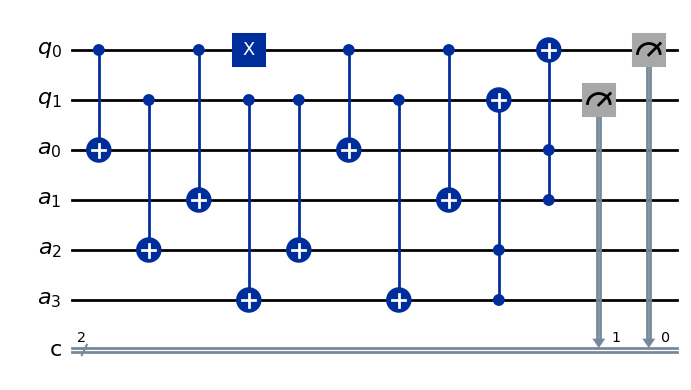

After Phase Flip Error Detection and Correction Counts: {'00': 1024}


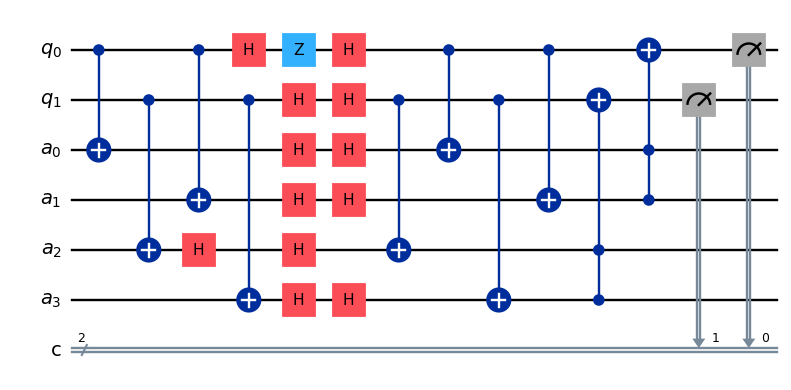

In [5]:
##### ERROR DETECTION + CORRECTION CODE ###########


from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt
from qiskit.visualization import plot_circuit_layout


def add_cnot(qc,q1,q2,q3):
    qc.cx(q1,q2)
    qc.cx(q1,q3)

    return qc

def add_toffoli(qc,q1,q2,q3):
    qc.ccx(q3,q2,q1)
    return qc

def add_hadamard(qc,q1,q2,q3):
    qc.h(q1)
    qc.h(q2)
    qc.h(q3)

    return qc

def bit_flip_correction():
    q = QuantumRegister(2,'q')
    a = QuantumRegister(4,'a')
    c = ClassicalRegister(2,'c')

    qc = QuantumCircuit(q,a,c)


    ###

    # Create any 2 qubit state here using q[0] and q[1]
    # qc.h(q[0])
    # qc.cx(q[0],q[1])

    ###

    qc=add_cnot(qc,q[0],a[0],a[1])
    qc= add_cnot(qc,q[1],a[2],a[3])


    #### Introducing bit flip errors here

    qc.x(q[0])
    # qc.x(q[1])

    ####

    qc=add_cnot(qc,q[0],a[0],a[1])
    qc =add_cnot(qc,q[1],a[2],a[3])

    qc = add_toffoli(qc,q[0],a[0],a[1])
    qc = add_toffoli(qc,q[1],a[2],a[3])


    qc.measure([q[0],q[1]],[c[0],c[1]])

    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts()
    print("After Bit Flip Error Detection and Correction Counts:", counts)

    fig, axs = plt.subplots(1, 1, figsize=(12, 4))
    qc.draw(output='mpl', ax=axs)

    plt.tight_layout()
    plt.show()
    return

def phase_flip_correction():
    q = QuantumRegister(2,'q')
    a = QuantumRegister(4,'a')
    c = ClassicalRegister(2,'c')

    qc = QuantumCircuit(q,a,c)

    ###

    # Create any 2 qubit state here using q[0] and q[1]
    # qc.x(q[0])
    # qc.h(q[0])
    # qc.cx(q[0],q[1])

    ###

    qc=add_cnot(qc,q[0],a[0],a[1])
    qc= add_cnot(qc,q[1],a[2],a[3])

    qc = add_hadamard(qc,q[0],a[0],a[1])
    qc= add_hadamard(qc,q[1],a[2],a[3])


    #### Introducing phase flip errors here

    qc.z(q[0])
    # qc.z(q[1])

    ####

    qc = add_hadamard(qc,q[0],a[0],a[1])
    qc= add_hadamard(qc,q[1],a[2],a[3])

    qc=add_cnot(qc,q[0],a[0],a[1])
    qc =add_cnot(qc,q[1],a[2],a[3])

    qc = add_toffoli(qc,q[0],a[0],a[1])
    qc = add_toffoli(qc,q[1],a[2],a[3])


    qc.measure([q[0],q[1]],[c[0],c[1]])

    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(qc, shots=1024).result()
    counts = result.get_counts()
    print("After Phase Flip Error Detection and Correction Counts:", counts)

    fig, axs = plt.subplots(1, 1, figsize=(12, 4))
    qc.draw(output='mpl', ax=axs)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    bit_flip_correction()
    phase_flip_correction()


